# GD vs Momentum : 데이터준비

In [1]:
import numpy as np
import matplotlib.pylab as plt
from visualize import contour, contour_with_quiver, surf, contour_with_path

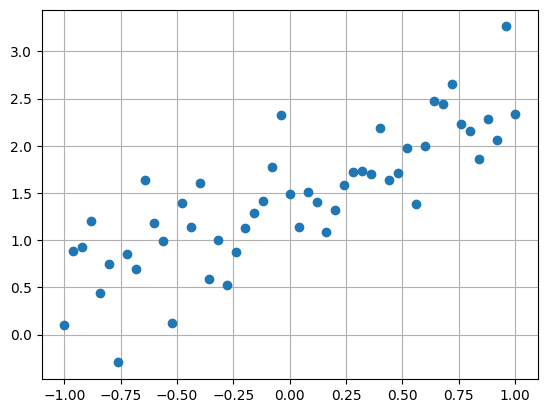

In [2]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5 + x + 1.0
y_train = f(x_train) + 0.4 * np.random.randn(len(x_train))
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [3]:
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

In [4]:
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i])**2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

In [5]:
def generate_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    out_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = (features[start_i:end_i], labels[start_i:end_i])
        out_batches.append(batch)
    return out_batches


# GD vs Momentum

In [6]:
# SGD
batch_size = 10
lr = 0.01
MaxEpochs = 51

# Momentum
alpha = .9


In [7]:
w0 = np.array([4.0, -1.0])
path_sgd = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1

0 [ 4. -1.] 4.672797337744839
10 [3.46254931 0.11464823] 2.0495766606659087
20 [3.03484694 0.7155069 ] 1.0903191015405516
30 [2.6895012  1.03705102] 0.6795113919292931
40 [2.4078061 1.2071366] 0.4696488114764217
50 [2.17642553 1.29541754] 0.3460641411655482


# Momentum

In [8]:
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)

for epoch in range(MaxEpochs):
    if epoch % 10 == 0: 
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

0 [ 4. -1.] 4.672797337744839
10 [1.34864746 1.35752551] 0.11074221652793804
20 [1.04949831 1.35776579] 0.08686217362908497
30 [1.04623698 1.35388506] 0.08713465735674622
40 [1.04669203 1.35370633] 0.08716389330314801
50 [1.04671033 1.35370439] 0.08716457050148585


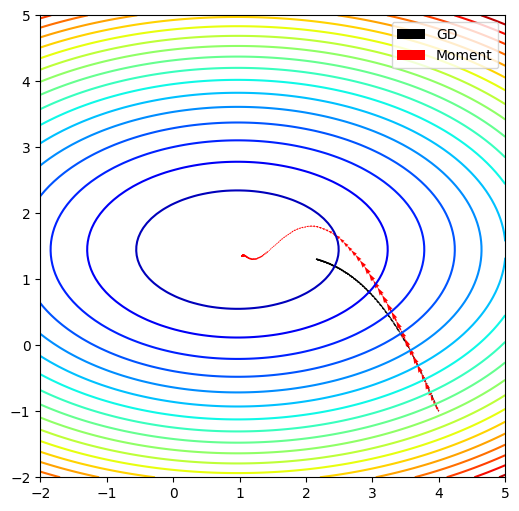

In [16]:
W0 = np.linspace(-2, 5, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0, W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i, j], W1[i, j]])
        LOSSW[i, j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet,
           levels=np.linspace(0, max(LOSSW.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1],
          paths[1, 1:]-paths[1, :-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1],
          paths[1, 1:]-paths[1, :-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD', 'Moment'])
plt.show()


# GD

In [17]:
# SGD
batch_size = 10
lr = 1.5
MaxEpochs = 51

# Adagrad
epsilon = lr
delta = 1E-7

In [25]:
w0 = np.array([4.0, -1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1    

0 [ 4. -1.] 4.672797337744839
10 [1.25308366 0.42851412] 0.6162718559094461
20 [1.25308366 0.42851412] 0.6162718559095017
30 [1.25308366 0.42851412] 0.6162718559095017
40 [1.25308366 0.42851412] 0.6162718559095017
50 [1.25308366 0.42851412] 0.6162718559095017


# Adagrad

In [26]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = - epsilon / (delta + np.sqrt(r)) * grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.672797337744839
10 [1.09994847 1.20668641] 0.11390890320487276
20 [1.09649301 1.22772269] 0.10887775665007482
30 [1.09363211 1.24182035] 0.10573244977797887
40 [1.09122684 1.25209669] 0.1035531695883167
50 [1.08917084 1.26000869] 0.10194010092501415


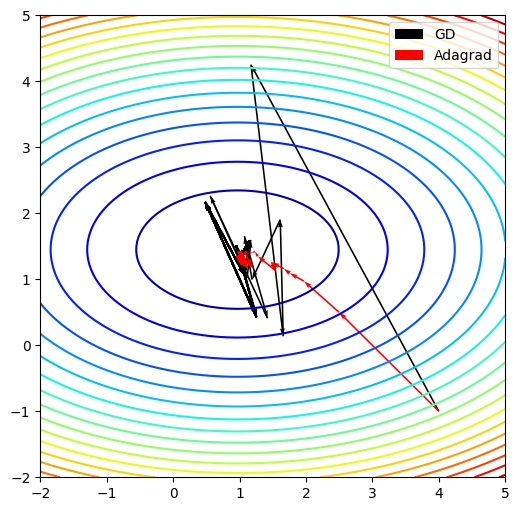

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))

paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1], paths[1, 1:]-paths[1, :-1], 
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1], paths[1, 1:]-paths[1, :-1], 
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD', 'Adagrad'])
plt.show()

# Adagrad

In [28]:
MaxEpochs = 51
batch_size = 10
# Adagrad
epsilon = 0.25
delta = 1E-6
# RMSProp
rho = 0.9

In [29]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagrad = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagrad.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = -epsilon / (delta + np.sqrt(r)) * grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.672797337744839
10 [1.85604592 1.09555411] 0.28042540779337277
20 [1.36240904 1.31511993] 0.11736481523868192
30 [1.17658086 1.34593465] 0.09435672564805972
40 [1.10197843 1.34830643] 0.0897116652894078
50 [1.07125121 1.34744992] 0.0885456096538729


# RMSProp

In [30]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho * r + (1. - rho) * grad * grad
        delw = -epsilon * grad / np.sqrt(delta + r)
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.672797337744839
10 [1.22218079 0.99907152] 0.19390921005887607
20 [1.22345439 0.99810395] 0.19445708493799935
30 [1.22345456 0.99810397] 0.19445709074460774
40 [1.22345456 0.99810397] 0.19445709073026832
50 [1.22345456 0.99810397] 0.1944570907302568


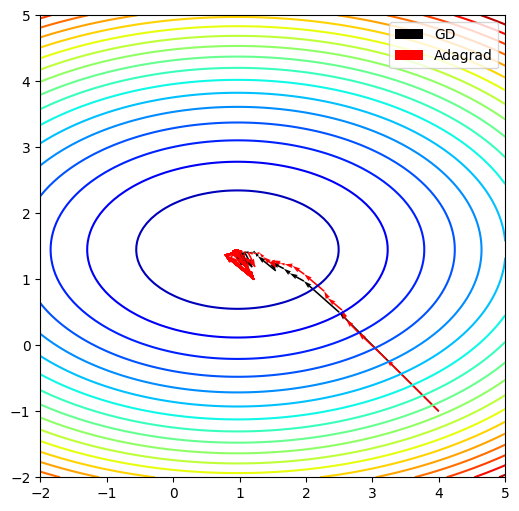

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1], paths[1, 1:]-paths[1, :-1], 
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1], paths[1, 1:]-paths[1, :-1], 
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD', 'Adagrad'])
plt.show()

# RMSProp vs Adam

# RMSProp

In [33]:
MaxEpochs = 51
batch_size = 10
epsilon = 0.1
delta = 1E-6
# RMSProp
rho = 0.9

# Adam
delta_adam = 1E-8
rho1 = 0.9
rho2 = 0.999

In [35]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho * r + (1. - rho) * grad * grad
        delw = -epsilon * grad / np.sqrt(delta + r)
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.672797337744839
10 [1.11389091 1.23278044] 0.10859263317517055
20 [1.12665256 1.22523719] 0.1109213380133076
30 [1.12667632 1.22523767] 0.11092252994160566
40 [1.12667635 1.22523768] 0.11092252995599915
50 [1.12667635 1.22523768] 0.11092252995540317


# Adam

In [36]:
w0 = np.array([4.0, -1.0])
s = np.zeros_like(w0)
r = np.zeros_like(w0)
path_adam = []
t = 0
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        s = rho1 * s + (1. - rho1) * grad
        r = rho2 * r + (1. - rho2) * (grad * grad)
        t += 1
        shat = s / (1. - rho1**t)
        rhat = r / (1. - rho2**t)
        delw = -epsilon * shat / (np.sqrt(rhat) + delta_adam)
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.672797337744839
10 [0.98124205 1.44237394] 0.08162439049783957
20 [1.05291249 1.35938801] 0.08681274590041739
30 [1.0478172  1.35369154] 0.08719582046412307
40 [1.0481925  1.35348877] 0.08722544580667191
50 [1.04847742 1.35344852] 0.08723712653621547


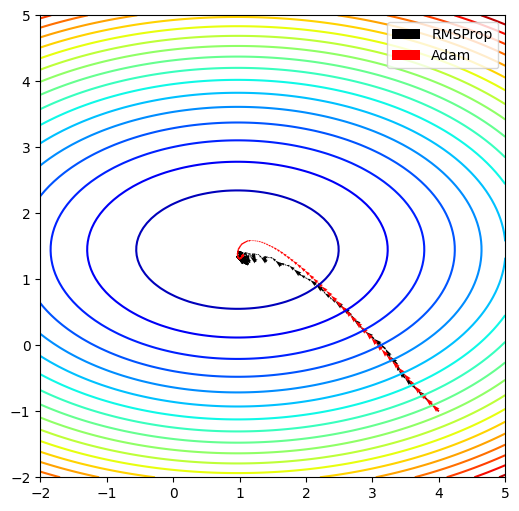

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1], paths[1, 1:]-paths[1, :-1], 
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1], paths[1, 1:]-paths[1, :-1], 
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['RMSProp', 'Adam'])
plt.show()